In [1]:
### FUNCTION DEFINITION BLOCK ###

# Read the modeling data from the CSV file
def get_Strategic_Subject_List_Data():
    raw_data = pd.read_csv("Strategic_Subject_List.csv", low_memory = False)
    #Replace spaces in column names by underscore
    raw_data.columns = [x.strip().replace(' ', '_') for x in raw_data.columns]
    #Replace the blank values with NAN 
    raw_data.replace(r'^\s+$', np.nan, regex=True, inplace = True)
    return(raw_data)
# Used the 8 predictors as mentioned in the SSL project on website
def feature_selection(raw_data):
    final_features = raw_data[['SSL_SCORE','PREDICTOR_RAT_AGE_AT_LATEST_ARREST',
                               'PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS',
                               'PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT',
                               'PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES',
                               'PREDICTOR_RAT_GANG_AFFILIATION',
                               'PREDICTOR_RAT_NARCOTIC_ARRESTS',
                               'PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY',
                               'PREDICTOR_RAT_UUW_ARRESTS']]
    return(final_features)

In [2]:
#### EXPLORATORY DATA ANALYSIS  ### 

# Importing the required libraries
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
from sklearn import preprocessing


#Adjusting the display options of Pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


#Importing the python matplot library for exploratory data analysis
import matplotlib.pyplot as plt
import pandas as pd

# Import the raw data from the csv file
raw_data = get_Strategic_Subject_List_Data()

# Finding out all the columns that have missing values
print("## Column Names ##                   ## Missing Values ##")
print(raw_data.isnull().sum())

# Selecting final features for the model
final_features = feature_selection(raw_data)

## Column Names ##                   ## Missing Values ##
SSL_SCORE                                        0
PREDICTOR_RAT_AGE_AT_LATEST_ARREST             102
PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS          0
PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT          0
PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES           0
PREDICTOR_RAT_GANG_AFFILIATION                   0
PREDICTOR_RAT_NARCOTIC_ARRESTS                   0
PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY         0
PREDICTOR_RAT_UUW_ARRESTS                        0
SEX_CODE_CD                                      0
RACE_CODE_CD                                     0
WEAPON_I                                         0
DRUG_I                                           0
AGE_GROUP                                      153
AGE_TO                                         153
STOP_ORDER_NO                               397027
PAROLEE_I                                   385600
LATEST_DATE                                      0
LATEST_DIST             

SEX_CODE_CD
F     96307
M    302320
X        57
Name: SSL_SCORE, dtype: int64


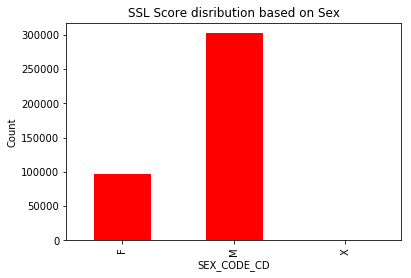

In [90]:
# Exploratory Data Analysis for SEX_CODE_CD Variable
var = raw_data.groupby('SEX_CODE_CD').SSL_SCORE.count()
print(var)
plt.title('SSL Score disribution based on Sex')
plt.ylabel('Count')
var.plot(kind='bar', Color = 'Red')

plt.show()

DRUG_I
N    305877
Y     92807
Name: SSL_SCORE, dtype: int64


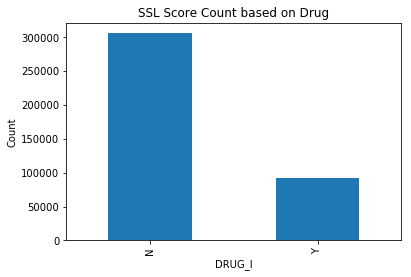

In [7]:
# Exploratory Data Analysis for 'DRUG_I' Variable

# DRUG_I: Indicates 'Y' if atleast One Drug Arrest in past 10 Years

var = raw_data.groupby('DRUG_I').SSL_SCORE.count()
print(var)
plt.title('SSL Score Count based on Drug')
plt.ylabel('Count')
var.plot(kind='bar')
plt.show()

WEAPON_I
N    379537
Y     19147
Name: SSL_SCORE, dtype: int64


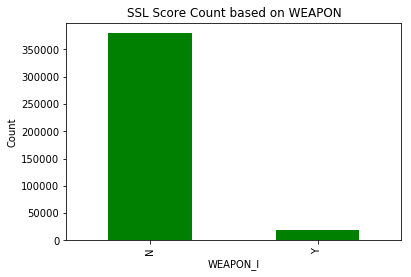

In [6]:
# Exploratory Data Analysis for 'WEAPON_I' Variable

# WEAPON_I: Is 'Y' if at least one Weapon (UUW) Arrest in past 10 years

var = raw_data.groupby('WEAPON_I').SSL_SCORE.count()
print(var)
plt.title('SSL Score Count based on WEAPON')
plt.ylabel('Count')
var.plot(kind='bar', color = 'Green')
plt.show()

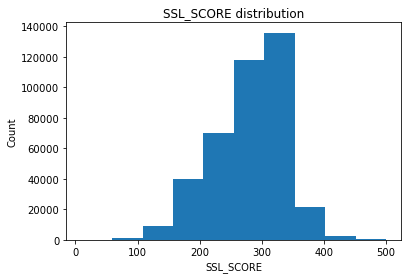

In [62]:
# SSL Histrogram
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(raw_data['SSL_SCORE'],bins = 10)
plt.title('SSL_SCORE distribution')
plt.xlabel('SSL_SCORE')
plt.ylabel('Count')
plt.show()

RACE_CODE_CD
API      4617
BLK    207842
I         276
U        1899
WBH      1974
WHI     82366
WWH     99710
Name: SSL_SCORE, dtype: int64


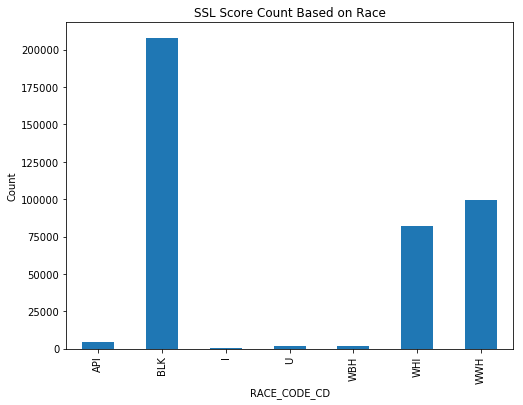

In [5]:
# Exploratory Data Analysis for 'RACE_CODE_CD' Variable

# RACE_CODE_CD: Subject's Race/Ethnicity as of their latest arrest record.

var = raw_data.groupby('RACE_CODE_CD').SSL_SCORE.count()
print(var)
plt.title('SSL Score Count Based on Race')
plt.ylabel('Count')
var.plot(kind='bar',figsize=(8, 6))
plt.show()

AGE_GROUP
20-30           140587
30-40            88561
40-50            58647
50-60            34173
60-70             7717
70-80              980
less than 20     67866
Name: SSL_SCORE, dtype: int64


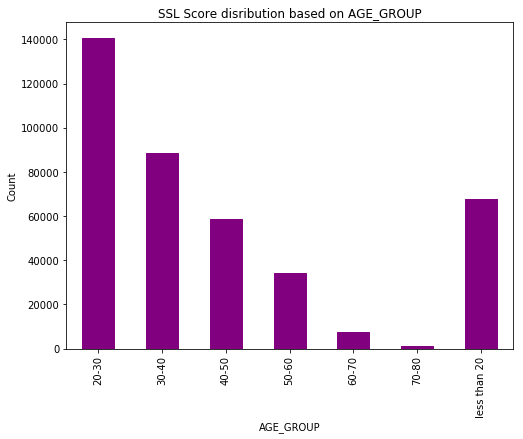

In [94]:
# Exploratory Data Analysis for 'AGE_GROUP' Variable

# AGE_GROUP: Subject's Race/Ethnicity as of their latest arrest record.

var = raw_data.groupby('AGE_GROUP').SSL_SCORE.count()
print(var)
plt.title('SSL Score disribution based on AGE_GROUP')
plt.ylabel('Count')
var.plot(kind='bar',Color = 'Purple',figsize=(8, 6))
plt.show()

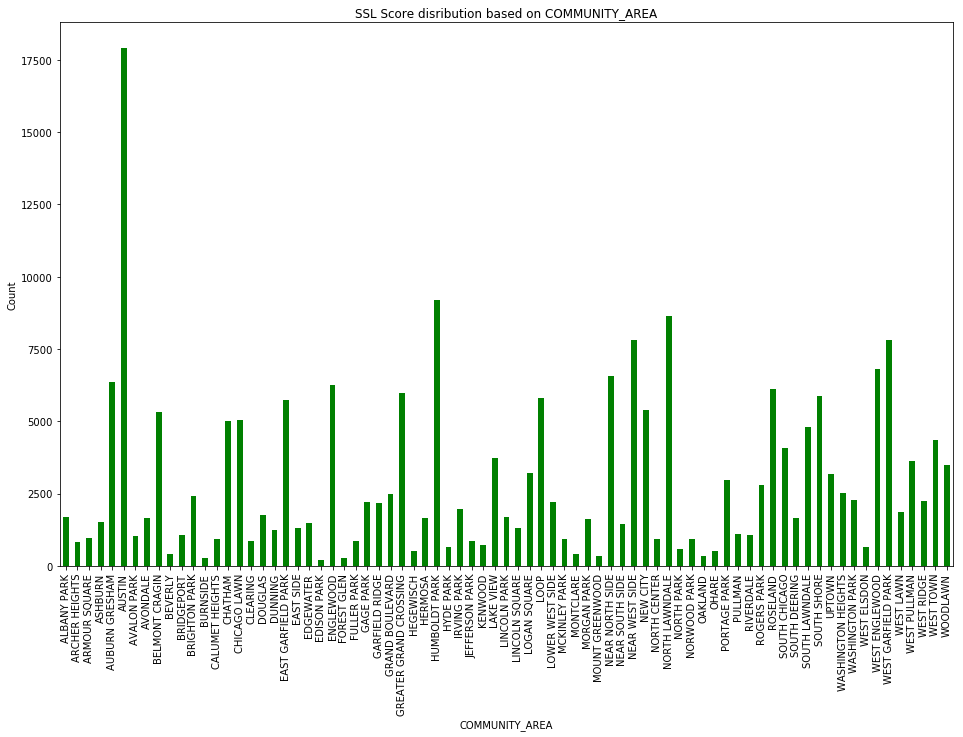

In [95]:
#raw_data['COMMUNITY_AREA']
# Exploratory Data Analysis for 'COMMUNITY_AREA' Variable

# COMMUNITY_AREA: Community Area of Arrest for the Subject's latest arrest record.
var = raw_data.groupby('COMMUNITY_AREA').SSL_SCORE.count() 
plt.title('SSL Score disribution based on COMMUNITY_AREA')
plt.ylabel('Count')
var.plot(kind='bar',figsize=(16, 10),color = 'Green')
plt.show()

In [9]:
### Data Processing Block ###
# Segregating the Categorical and Numerical Variables
categorical = final_features.select_dtypes(include=['object'])
numeric = final_features.select_dtypes(exclude=['object'])


#Defining the Dummy variables for the categorical variables 
for name, values in categorical.items():
    dummies = pd.get_dummies(values.str.strip(), prefix = name, dummy_na=True)
    numeric = pd.concat([numeric, dummies], axis=1)
    
#Imputing the missing values  
for name in numeric:
    if pd.isnull(numeric[name]).sum() > 0:
        numeric["%s_mi" % (name)] = pd.isnull(numeric[name])
        median = numeric[name].median()
        numeric[name] = numeric[name].apply(lambda x: median if pd.isnull(x) else x)

In [10]:
# Defining the target variable and independent variables

y = numeric['SSL_SCORE']
X = numeric.drop(['SSL_SCORE'], axis = 1)

# Creating a Holdout for Testing of 20%
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [75]:
# GLM Ridge model using sk-learn ##
from sklearn import linear_model
reg = linear_model.Ridge()

# set up cv
from sklearn import model_selection
cv = model_selection.KFold(5)

# pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('standardize', preprocessing.StandardScaler())
                           , ('model', reg) ])
# Parameter tuning
alpha=[0.005]

from sklearn.model_selection import GridSearchCV
optimized_reg = GridSearchCV(estimator=pipeline
                            , cv=cv
                            , param_grid=dict(model__alpha = alpha)
                            , scoring = 'neg_mean_squared_error'
                            , verbose = 1
                            , n_jobs = -1
                           )
optimized_reg.fit(X_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=Pipeline(steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'model__alpha': [0.005]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=1)

In [78]:
## Evaluating GLM - Ridge Regression on Holdout - Test Data, using mean_squared_error metrics ##
from sklearn.metrics import mean_squared_error
y_pred = optimized_reg.predict(X_test)
print("The Mean Squared Error Using GLM - Ridge is : ",mean_squared_error(y_test, y_pred))

The Mean Squared Error Using GLM - Ridge is :  158.702387771


In [79]:
## Evaluating GLM - Ridge Regression on Holdout - Test Data, using R2 Metrics ##
from sklearn.metrics import r2_score
y_pred = optimized_reg.predict(X_test)
print("The R2 Using GLM - Ridge is :",r2_score(y_test, y_pred))

The R2 Using GLM - Ridge is : 0.95326202461


In [84]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

# set up cv
from sklearn import model_selection
cv = model_selection.KFold(5)

# pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('standardize', preprocessing.StandardScaler()),('model', gbr) ])

# Parameters for tuning the model
gbc_learning_rate = [0.1,0.01]
gbc_max_depth = [4, 6]
gbc_min_samples_leaf = [3, 5]
gbm_max_features = [1.0, 0.1]

#Implementing GridSearchCV
from sklearn.model_selection import GridSearchCV
optimized_gbr = GridSearchCV(estimator=pipeline
                            , cv=cv
                            , param_grid=dict(model__learning_rate= gbc_learning_rate, 
                                              model__max_depth = gbc_max_depth,
                                              model__min_samples_leaf = gbc_min_samples_leaf,
                                              model__max_features = gbm_max_features)
                            , scoring = 'neg_mean_squared_error'
                            , verbose = 1
                            , n_jobs = -1)

#Fitting the model with Grid Search
optimized_gbr.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 21.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=Pipeline(steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,...       presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'model__learning_rate': [0.1, 0.01], 'model__min_samples_leaf': [3, 5], 'model__max_features': [1.0, 0.1], 'model__max_depth': [4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=1)

In [83]:
## Evaluating GBM on Holdout - Test Data ##
from sklearn.metrics import mean_squared_error
y_pred = optimized_gbr.predict(X_test)
print("The Mean Squared Error Using GBM Regressor is : ",mean_squared_error(y_test, y_pred))

The Mean Squared Error Using GBM Regressor is :  154.761834404


In [72]:
#Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

# set up cv
from sklearn import model_selection
cv = model_selection.KFold(5)

# pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('standardize', preprocessing.StandardScaler()),('model', rfr) ])


# Parameters for tuning the model
tree_depth = [5,6]
tree_min_samples_split = [5, 10]
tree_min_samples_leaf = [5, 10]
tree_max_leaf_nodes = [10,15]
#Implementing GridSearchCV
from sklearn.model_selection import GridSearchCV
optimized_rfr = GridSearchCV(estimator=pipeline
                            , cv=cv
                            , param_grid=dict(model__max_depth= tree_depth, 
                                              model__min_samples_split = tree_min_samples_split,
                                              model__min_samples_leaf = tree_min_samples_leaf,
                                              model__max_leaf_nodes = tree_max_leaf_nodes)
                            , scoring = 'neg_mean_squared_error'
                            , verbose = 1
                            , n_jobs = -1)

#Fitting the model with Grid Search
optimized_rfr.fit(X_train, y_train)
print("The best estimator : ", optimized_rfr.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


The best estimator :  Pipeline(steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=15,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))])


In [82]:
## Evaluating Random Forest Regressor on Holdout - Test Data ##
from sklearn.metrics import mean_squared_error
y_pred = optimized_rfr.predict(X_test)
print("The Mean Squared Error Using Random Forest Regressor is : ",mean_squared_error(y_test, y_pred))

The Mean Squared Error Using Random Forest Regressor is :  247.065968811


In [73]:
## XGB Regressor Model  ##
import xgboost as xgb
xg = xgb.XGBRegressor()
# set up cv
from sklearn import model_selection
cv = model_selection.KFold(5)

# pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('standardize', preprocessing.StandardScaler()),('model', xg) ])

# Parameters for tuning the model
#gbc_learning_rate = [0.1,0.01]
max_depth = [4, 6,8]
n_estimators = [50, 100,150]

#Implementing GridSearchCV
from sklearn.model_selection import GridSearchCV
optimized_xg = GridSearchCV(estimator=pipeline
                            , cv=cv
                            , param_grid=dict(model__max_depth = max_depth,
                                              model__n_estimators = n_estimators)
                                             # model__max_features = gbm_max_features)
                            , scoring = 'neg_mean_squared_error'
                            , verbose = 1
                            , n_jobs = -1)

#Fitting the model with Grid Search
optimized_xg.fit(X_train, y_train)
print("The best estimator : ", optimized_xg.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 10.2min finished


The best estimator :  Pipeline(steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=150, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1))])


In [81]:
## Evaluating XGB Regressor on Holdout - Test Data ##
from sklearn.metrics import mean_squared_error
y_pred = optimized_xg.predict(X_test)
print("The Mean Squared Error Using XGBoost Regressor is : ",mean_squared_error(y_test, y_pred))

The Mean Squared Error Using XGBoost Regressor is :  154.562845543
